### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Mar 29th at 11.59pm CT
---

This is a regression problem. Many of the parts require minor variations of code to switch to new techniques, but otherwise using a similar workflow. 

Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.

MEK: Import block

In [1]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import astroML
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from astroML.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
from astroML.linear_model import PolynomialRegression
from sklearn.model_selection import train_test_split

/home/kaldorme/miniconda3/envs/astro8070/lib/python3.10/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


MEK: Read in data

In [2]:
hw7data1 = np.load("./../../homeworks/hw_data/hw7_data_1.npy")
X1 = hw7data1[:,0]
X2 = hw7data1[:,1]
y = hw7data1[:,2]
yerr = hw7data1[:,3]

MEK: Scatter plot of labels and each of the two components

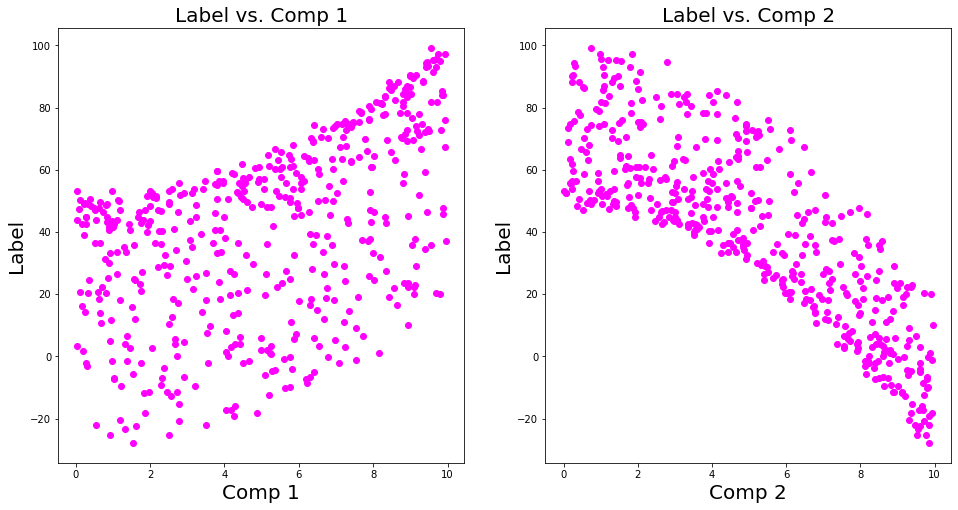

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.scatter(X1, y, color="magenta")
ax2.scatter(X2, y, color="magenta")
ax1.set_title("Label vs. Comp 1", fontsize=20)
ax1.set_xlabel("Comp 1", fontsize=20)
ax1.set_ylabel("Label", fontsize=20)
ax2.set_title("Label vs. Comp 2", fontsize=20)
ax2.set_xlabel("Comp 2", fontsize=20)
ax2.set_ylabel("Label", fontsize=20)
plt.show()

2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?

MEK: Make an array of zeros (to make the shape work when predicting), make two components into one array for fitting the model, predict based off each component individually.

In [4]:
zeros_array = np.zeros(50)
X = np.column_stack([X1, X2])

model = LinearRegression()
model.fit(X, y, yerr)

x1 = np.array([np.linspace(min(X1), max(X1), 50), zeros_array]).T
x2 = np.array([zeros_array, np.linspace(min(X2), max(X2), 50)]).T
y_pred1 = model.predict(x1)
y_pred2 = model.predict(x2)

MEK: Plot each component and the label with an additional curve for the predicted labels for that component.

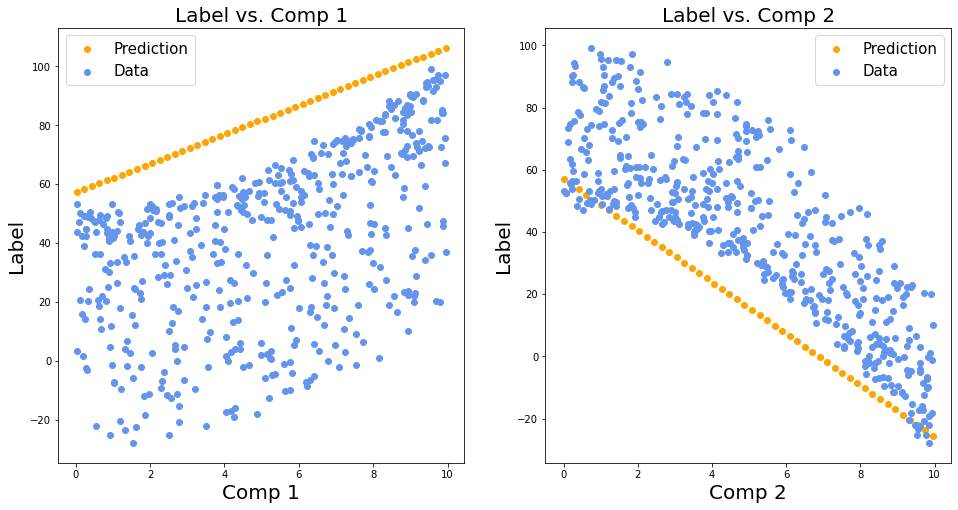

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.scatter(x1[:,0], y_pred1, label="Prediction", color="orange")
ax2.scatter(x2[:,1], y_pred2, label="Prediction", color="orange")
ax1.scatter(X1, y, label="Data", color="cornflowerblue")
ax2.scatter(X2, y, label="Data", color="cornflowerblue")
ax1.set_title("Label vs. Comp 1", fontsize=20)
ax1.set_xlabel("Comp 1", fontsize=20)
ax1.set_ylabel("Label", fontsize=20)
ax2.set_title("Label vs. Comp 2", fontsize=20)
ax2.set_xlabel("Comp 2", fontsize=20)
ax2.set_ylabel("Label", fontsize=20)
ax1.legend(fontsize=15)
ax2.legend(fontsize=15)
plt.show()

MEK: Not really the best fit, but the general trend makes sense. I recognize that the y intercept will probably be skewed by what the "other array" value is in my prediction section (I made the "other array" all zeros here), but the slope of the lines look pretty good.

3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

MEK: Try a linear regression fit, predict over an Xgrid that covers the full range of each data component.

In [6]:
model = LinearRegression()
model.fit(X, y, yerr)

x1 = np.linspace(min(X1), max(X1), 50)
x2 = np.linspace(min(X2), max(X2), 50)
Xgrid = np.vstack(list(map(np.ravel, np.meshgrid(x1, x2)))).T
y_pred = model.predict(Xgrid)

MEK: Plot the predicted labels over the meshgrid as well as the data. For the most part, it's an alright fit! It would still be better to visualize over all three dimensions. Let's do that next!

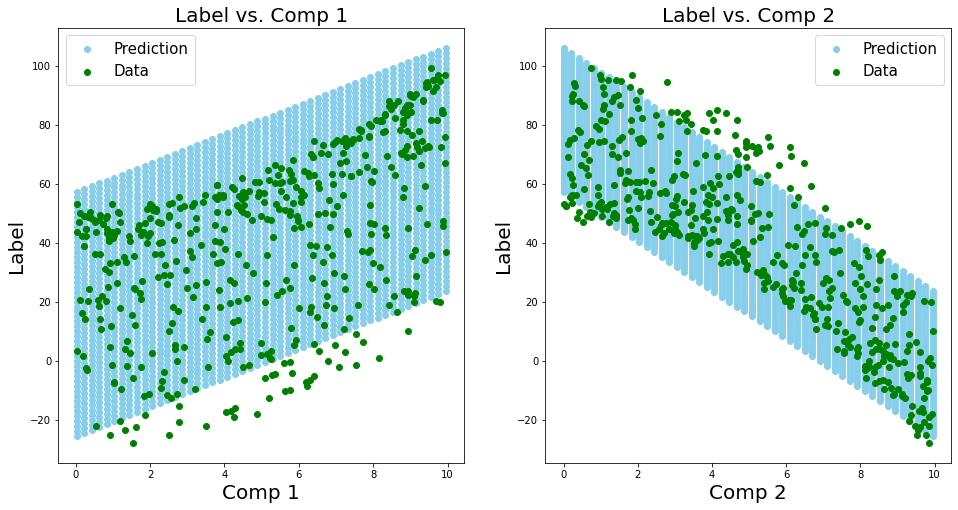

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.scatter(Xgrid[:,0], y_pred, label="Prediction", color="skyblue")
ax2.scatter(Xgrid[:,1], y_pred, label="Prediction", color="skyblue")
ax1.scatter(X1, y, label="Data", color="green")
ax2.scatter(X2, y, label="Data", color="green")
ax1.set_title("Label vs. Comp 1", fontsize=20)
ax1.set_xlabel("Comp 1", fontsize=20)
ax1.set_ylabel("Label", fontsize=20)
ax2.set_title("Label vs. Comp 2", fontsize=20)
ax2.set_xlabel("Comp 2", fontsize=20)
ax2.set_ylabel("Label", fontsize=20)
ax1.legend(fontsize=15)
ax2.legend(fontsize=15)
plt.show()

MEK: I ran these then commented them out, so I wouldn't accidentally rerun this cell $\ddot\smile$

In [8]:
# install the relevant interactive plot packages
# only do this once
#!pip install ipywidgets ipympl

MEK: Plot the data and the predicted labels that I made above in 3D! This is very cool. Borrowed from SRT.

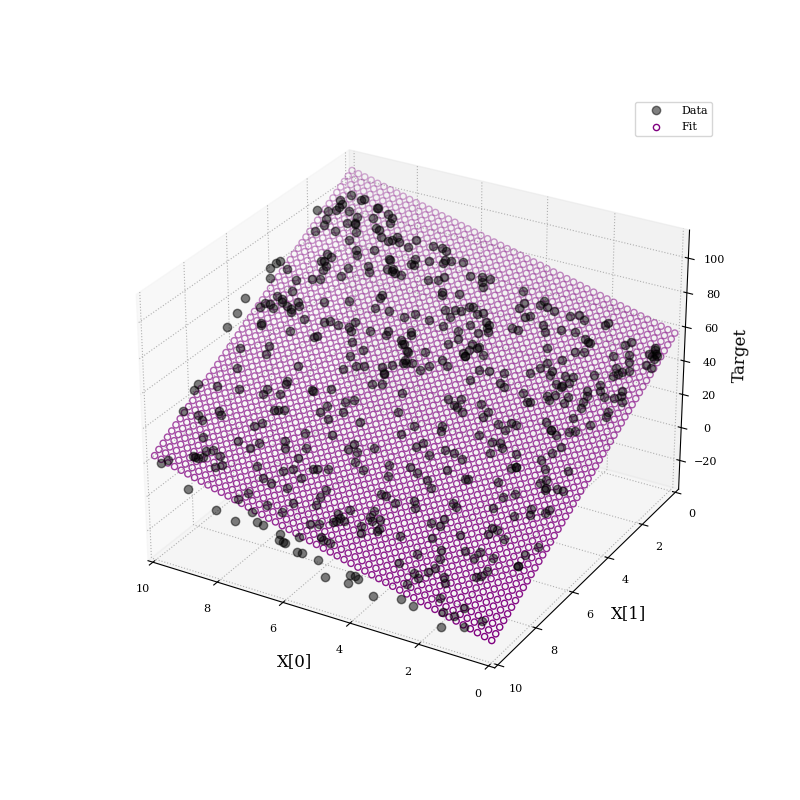

In [23]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X1, X2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5, label="Data")
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='purple', label="Fit")
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.legend()
ax.view_init(elev=28, azim=120)

MEK: Not needed here, but kept in the notebook for the future non-interactive plot.

In [25]:
### Always do this line at the start
### of a static plotting cell
#%matplotlib inline

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*

MEK: Borrow ridge parameter guesses from SRT, fit with a GridSearchCV with the Ridge fitter. Print the best parameters and the best score.

In [11]:
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
grid = GridSearchCV(Ridge(), param_grid=ridge_params)
grid.fit(X, y)
bestparams = grid.best_params_
bestscore = grid.best_score_
print("Best parameters: ", bestparams)
print("Best score: ", '%.4f'%bestscore)

Best parameters:  {'alpha': 1.0, 'solver': 'svd'}
Best score:  0.9291


MEK: Plot interactively in 3D.

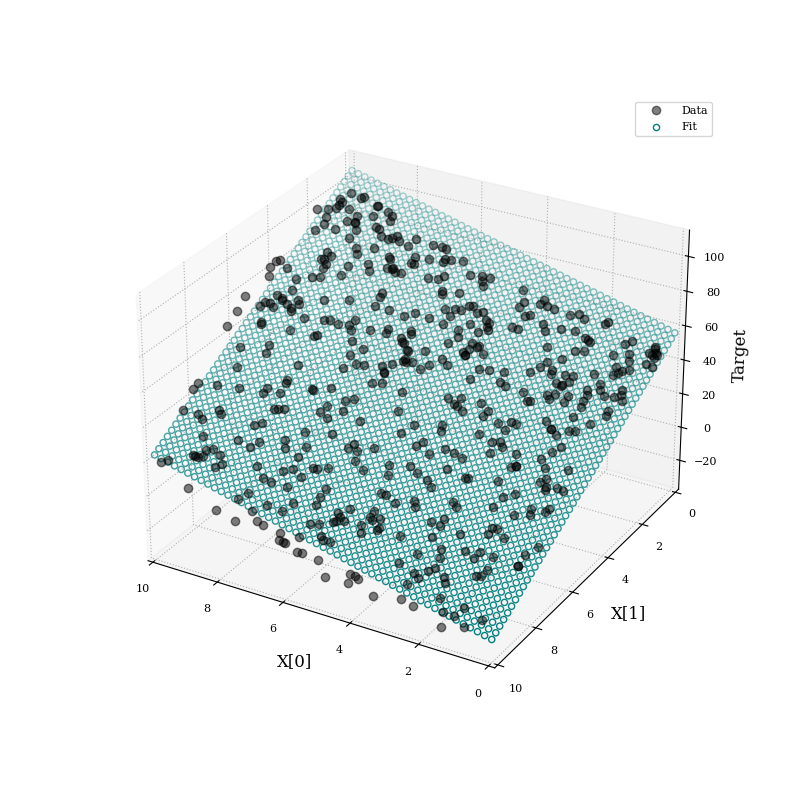

In [26]:
### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ridge = Ridge(alpha = bestparams['alpha'], solver = bestparams['solver'])
ridge.fit(X, y)
y_ridge = ridge.predict(Xgrid)

ax = fig.add_subplot(111, projection='3d')

ax.plot(X1, X2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5, label="Data")
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_ridge, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='teal', label="Fit")
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.legend()
ax.view_init(elev=28, azim=120)

MEK: Fit again with RidgeCV with the same alpha guesses as suggested by SRT in the section above. Print the best alpha and best score. It's the same best alpha!

In [13]:
grid = RidgeCV(alphas=[0.05,0.1,0.2,0.5,1.0])
grid.fit(X, y)
bestalpha = grid.alpha_
bestscore = grid.best_score_
print("Best alpha: ", bestalpha)
print("Best score: ", "%.4f"%bestscore)

Best alpha:  1.0
Best score:  -59.2200


MEK: Plot interactive 3D.

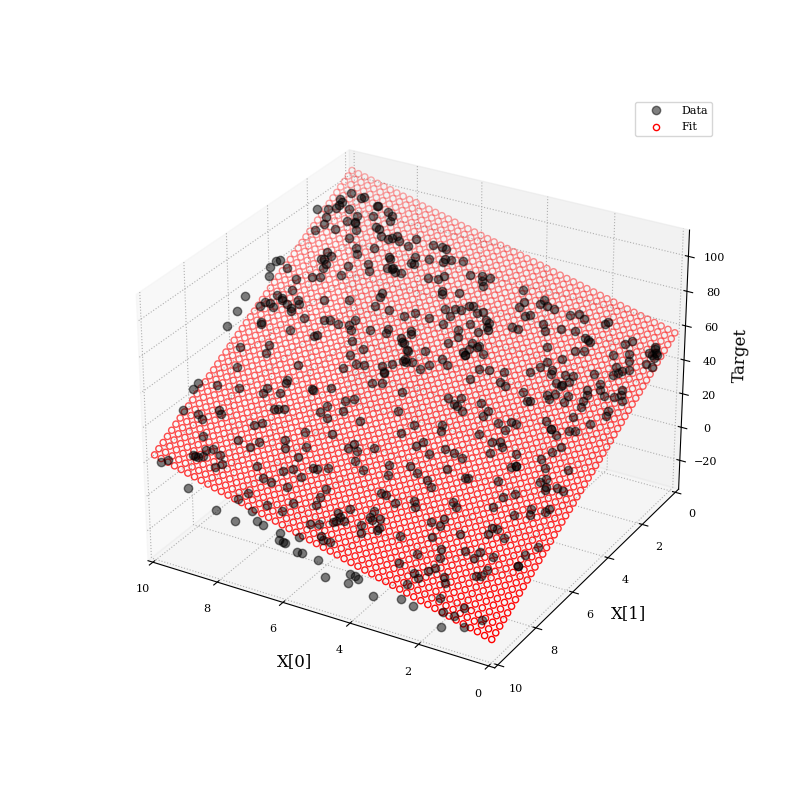

In [27]:
### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ridgecv = RidgeCV(alphas=bestalpha)
ridgecv.fit(X, y)
y_ridgecv = ridgecv.predict(Xgrid)

ax = fig.add_subplot(111, projection='3d')

ax.plot(X1, X2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5, label="Data")
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_ridgecv, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='red', label="Fit")
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.legend()
ax.view_init(elev=28, azim=120)

5. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*

MEK: Fit with GaussianProcessRegressor without giving any information about the uncertainties in the data. Visualize in 3D. I see some rogue Gaussians popping out of the surface. Let's inform the uncertainties next time.

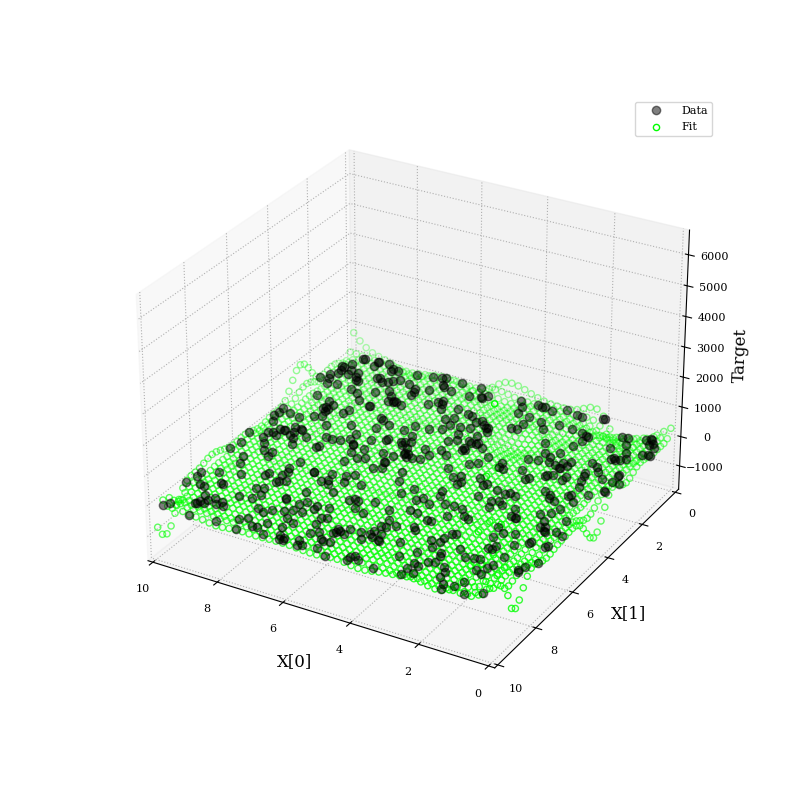

In [28]:
gpr = GaussianProcessRegressor()
gpr.fit(X, y)
y_gpr = gpr.predict(Xgrid)

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X1, X2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5, label="Data")
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_gpr, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='lime', label="Fit")
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.legend()
ax.view_init(elev=28, azim=120)

MEK: Let's try this again with some information about the error on the data. Visualize again - looks much better.

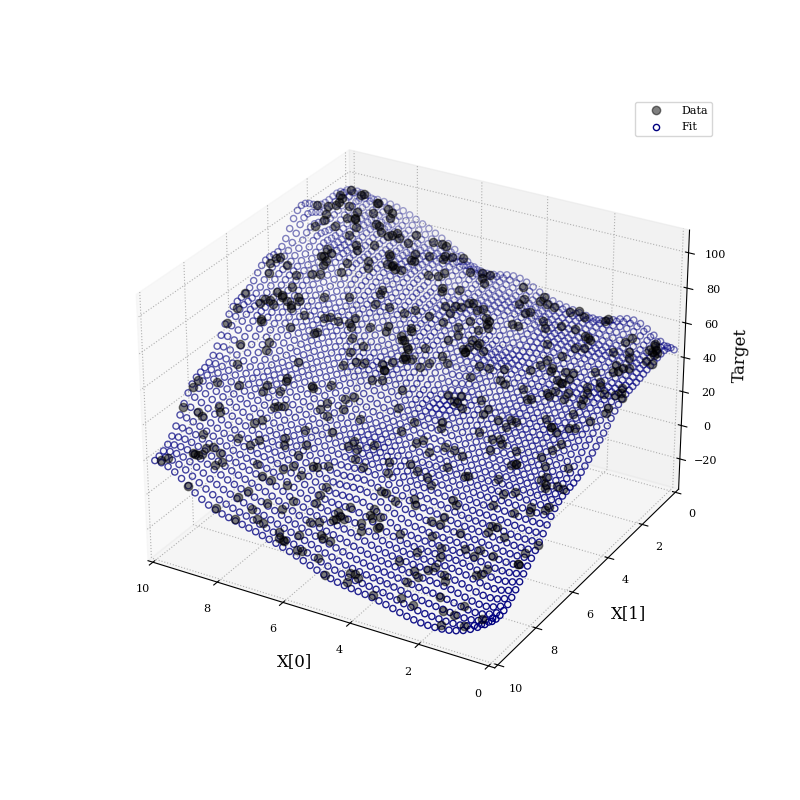

In [29]:
gpralpha = GaussianProcessRegressor(alpha=(yerr/y)**2)
gpralpha.fit(X, y)
y_gpralpha = gpralpha.predict(Xgrid)

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X1, X2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5, label="Data")
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_gpralpha, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='navy', label="Fit")
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.legend()
ax.view_init(elev=28, azim=120)

6. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?

MEK: Use PolynomialRegresssion with a degree of 4 to fit the data. Print the best fit coefficients (there are a lot!). Predict on the meshgrid, and plot the prediction. It looks better than the linear model (this one is a bit more Pringle shaped, which is more descriptive than a plane), but less informative than the GPR models (those manifolds were super bumpy, but is that overfitting? Not necessarily.).

Polynomial coefficients:  [ 5.00363666e+01  3.26437755e-01  7.04566290e-02  3.76478281e-01
 -2.37398556e-02 -8.70986046e-01  1.19122182e-02  2.54637597e-02
 -1.32002013e-02  2.02705370e-02 -4.53796076e-04 -5.21142180e-04
 -2.06194460e-03  1.68744189e-03 -1.52054198e-03]


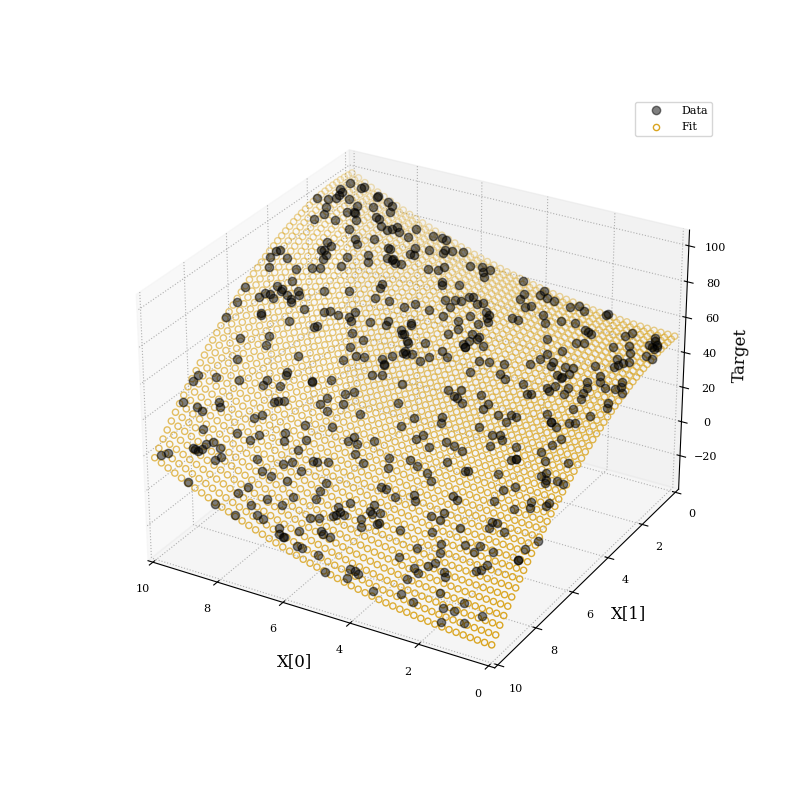

In [30]:
poly = PolynomialRegression(degree=4)
poly.fit(X, y)
y_poly = poly.predict(Xgrid)
print("Polynomial coefficients: ", poly.coef_)

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X1, X2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5, label="Data")
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_poly, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='goldenrod', label="Fit")
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.legend()
ax.view_init(elev=28, azim=120)

7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

MEK: Separate the training and testing data 80-20. We should have 400 and 100 in each section.

In [31]:
Xtrain, Xtest, ytrain, ytest, yerrtrain, yerrtest = train_test_split(X, y, yerr, test_size=0.2)
print("Length of training: ", len(ytrain))
print("Length of testing: ", len(ytest))

Length of training:  400
Length of testing:  100


MEK: Take the training data, and split it into training and cross-validation 80-20 again. It makes sense that now we have 320 and 80, respectively, when we started with a section of 400 points.

In [19]:
Xtrain, Xcv, ytrain, ycv, yerrtrain, yerrcv = train_test_split(Xtrain, ytrain, yerrtrain, test_size=0.2)
print("Length of training: ", len(ytrain))
print("Length of CV: ", len(ycv))

Length of training:  320
Length of CV:  80


MEK: Make an array for the possible polynomial degrees 1-10, inclusive.

In [20]:
polydeg = np.arange(1,11)

MEK: How can we calculate the BIC given the information we have? Leverage the $\chi^2$. k describes the number of fit parameters (which should be our polynomial degree), and N should be the number of data points, which will be the length of the arrays that we feed in (320, 100, 80 for train, test, CV).

$$ \chi^2_\mathrm{dof}  = \frac{1}{N-k} \sum_i^N \left( \frac{y - y_\mathrm{fit}}{\sigma_y} \right)^2, $$

$${\rm BIC} = \chi^2 + k \ln N,$$ 

$${\rm BIC} = \frac{1}{N-k} \sum_i^N \left( \frac{y - y_\mathrm{fit}}{\sigma_y} \right)^2  + k \ln N,$$ 

MEK: Use matplotlib inline to get a stationary plot here. Calculate rms error (borrowed from SRT) and BIC (derivation above this cell) for each polynomial degree, then plot.

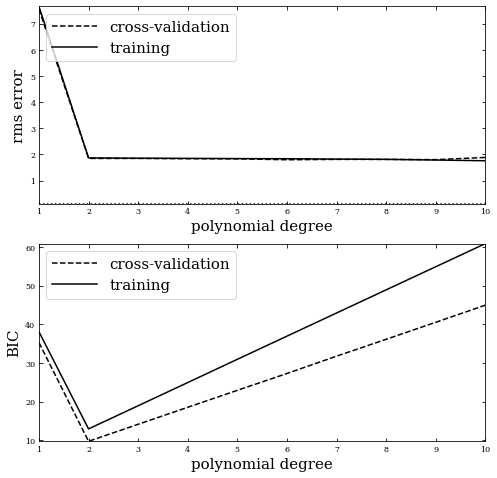

In [33]:
# Ivezic v2, Figure 8.14, panels made bigger by GTR
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

%matplotlib inline

training_err = np.zeros(polydeg.shape)
crossval_err = np.zeros(polydeg.shape)
BIC_train = np.zeros(polydeg.shape)
BIC_crossval = np.zeros(polydeg.shape)

fig = plt.figure(figsize=(8, 8))
for i in range(len(polydeg)):
    p = PolynomialRegression(degree=polydeg[i])
    p.fit(Xtrain, ytrain)
    training_err[i] = np.sqrt(np.sum((p.predict(Xtrain)-ytrain) ** 2)/ len(ytrain))
    crossval_err[i] = np.sqrt(np.sum((p.predict(Xcv)-ycv) ** 2)/ len(ycv))
    BIC_train[i] = ((1/(len(ytrain)-polydeg[i]))*(np.sum(((ytrain-p.predict(Xtrain))/yerrtrain)**2)))+(polydeg[i]*np.log(len(ytrain)))
    BIC_crossval[i] = ((1/(len(ycv)-polydeg[i]))*(np.sum(((ycv-p.predict(Xcv))/yerrcv)**2)))+(polydeg[i]*np.log(len(ycv)))


ax = fig.add_subplot(211)
ax.plot(polydeg, crossval_err, '--k', label='cross-validation')
ax.plot(polydeg, training_err, '-k', label='training')
ax.plot(polydeg, 0.1 * np.ones(polydeg.shape), ':k')

ax.set_xlabel('polynomial degree',fontsize=15)
ax.set_ylabel('rms error',fontsize=15)
ax.legend(loc=2,fontsize=15)

ax = fig.add_subplot(212)
ax.plot(polydeg, BIC_crossval, '--k', label='cross-validation')
ax.plot(polydeg, BIC_train, '-k', label='training')

ax.legend(loc=2,fontsize=15)
ax.set_xlabel('polynomial degree',fontsize=15)
ax.set_ylabel('BIC',fontsize=15)

plt.show()

MEK: Best BIC (lowest value) is a polynomial degree of 2! Use that moving forward. Fit again with only a second degree polynomial. Calculate the rms error for the test set the same way as the loop above.

In [22]:
p = PolynomialRegression(degree=2)
p.fit(Xtrain, ytrain)
test_err = np.sqrt(np.sum((p.predict(Xtest)-ytest) ** 2)/ len(ytest))
print("RMS error for test: ", "%.4f"%test_err)

RMS error for test:  1.8384
